## keras的模型构建方法以及心得

In [1]:
import keras
from keras.layers import Input,Dense
from keras.models import Model
from keras.utils import plot_model
from keras.layers import concatenate
from keras.layers import Embedding,LSTM,merge

Using TensorFlow backend.


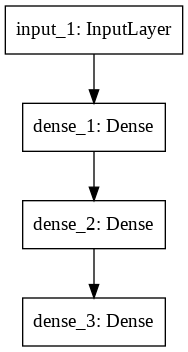

In [2]:
inputs = Input(shape=(784,))
x = Dense(64,activation='relu')(inputs)
x = Dense(64,activation='relu')(x)
predictions = Dense(10,activation='softmax')(x)

model = Model(inputs=inputs,outputs=predictions)
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
plot_model(model)

### Keras 的合并层

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
left_input (InputLayer)         (None, 784)          0                                            
__________________________________________________________________________________________________
right_input (InputLayer)        (None, 784)          0                                            
__________________________________________________________________________________________________
left_branch (Dense)             (None, 32)           25120       left_input[0][0]                 
__________________________________________________________________________________________________
right_branch (Dense)            (None, 32)           25120       right_input[0][0]                
____________________________________________________________________________________________

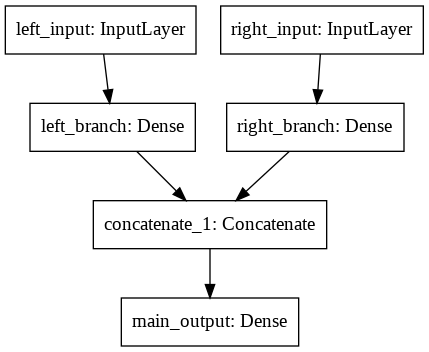

In [3]:
left_input = Input(shape=(784,),name='left_input')
left_branch = Dense(32,input_dim=784,name='left_branch')(left_input)

right_input = Input(shape=(784,),name='right_input')
right_branch = Dense(32,name='right_branch')(right_input)

x = concatenate([left_branch,right_branch])
predictions = Dense(10,activation='softmax',name='main_output')(x)
model = Model(inputs=[left_input,right_input],outputs=predictions)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())
plot_model(model)

keras的合并层有如下：
1. add :元素相加
2. concatenate :输出维度合并
3. multiply :元素相乘
4. average :平均
5. maximun ：最大值
6. dot :矩阵相乘

同样的，也和以自定义。如：
merged = Merge([left_branch,right_branch],mode=lambed x:x[0]-x[1])

### Keras 的多输出层

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 100, 512)     5120000     main_input[0][0]                 
__________________________________________________________________________________________________
aux_input (InputLayer)          (None, 5)            0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 32)           69760       embedding_1[0][0]               

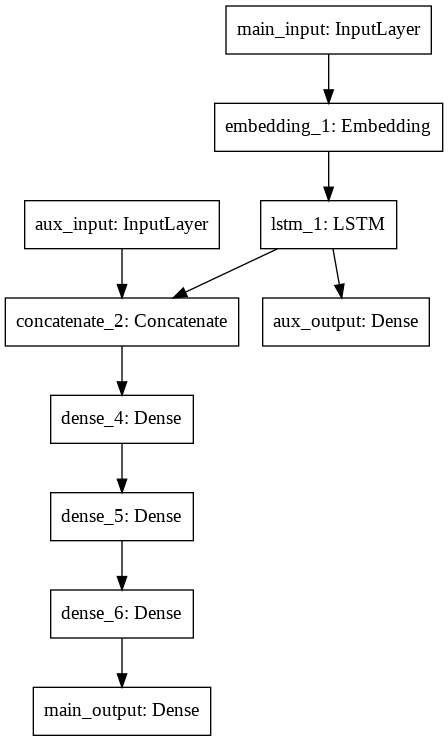

In [4]:

main_input = Input(shape=(100,),name='main_input')
x = Embedding(output_dim=512,input_dim=10000,input_length=100)(main_input)
lstm_out = LSTM(32)(x)
aux_output = Dense(1,activation='sigmoid',name='aux_output')(lstm_out)

aux_input = Input(shape=(5,),name='aux_input')
x = concatenate([aux_input,lstm_out])
x = Dense(64,activation='relu')(x)
x = Dense(64,activation='relu')(x)
x = Dense(32,activation='relu')(x)
main_output = Dense(1,activation='sigmoid',name='main_output')(x)
model = Model(inputs=[aux_input,main_input],outputs=[main_output,aux_output])
model.compile(optimizer='rmsprop',loss={'main_output': 'binary_crossentropy', 'aux_output': 'binary_crossentropy'},
              loss_weights={'main_output':1.,'aux_output':0.2})
print(model.summary())
plot_model(model)

keras中模型的编译时，loss函数要根据数出个数的不同，要传入字典的值，分别对应模型中输出那个的name键，以及方法值

In [5]:
print(123)

123
